In [0]:
import os
import glob
import shutil

In [0]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
pd.set_option('max_colwidth', -1)

In [4]:
%cd /content/drive/My Drive/case studies 2/Final_Face_Dataset/MTCNN experiments/concatenated_training


/content/drive/My Drive/case studies 2/Final_Face_Dataset/MTCNN experiments/concatenated_training


In [0]:
training_df = pd.read_csv('cleaned_images.csv')
training_cropped_images = np.load('cleaned_images.npy', allow_pickle=True)

In [6]:
training_df.head()

,Unnamed: 0,label,image,faces_found
0,0,Yoriko_Kawaguchi,Yoriko_Kawaguchi - _0_6007.jpg,1
1,1,Yoriko_Kawaguchi,Yoriko_Kawaguchi - _0_8892.jpg,1
2,2,Yoriko_Kawaguchi,Yoriko_Kawaguchi - _0_7536.jpg,1
3,3,Yoriko_Kawaguchi,Yoriko_Kawaguchi - _0_8708.jpg,1
4,4,Yoriko_Kawaguchi,Yoriko_Kawaguchi - _0_9563.jpg,1


In [0]:
del training_df['Unnamed: 0']

['Vicente_Fox - _0_2470.jpg' 'Vicente_Fox - _0_9178.jpg'
 'Vicente_Fox - _0_8023.jpg' ... 'Abdullah_Gul - _0_6979.jpg'
 'Abdullah_Gul - _0_1112.jpg' 'Abdullah_Gul - _0_6844.jpg']
------------------------------------------------------------------
One of this is Michael_Bloomberg 
------------------------------------------------------------------
Select the 0th or the 1st index position in the query below
------------------------------------------------------------------


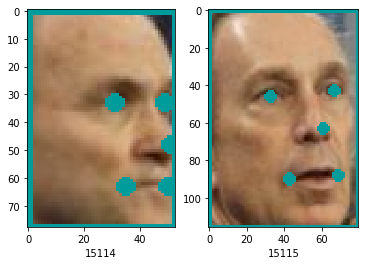

In [17]:
#a = input('Number of faces in the image')
b = training_df.loc[training_df['faces_found'] == 2]['image'].unique()
print(b)
#c = input('Index position of the image in the dataframe')
d = training_df.loc[training_df['faces_found'] == 2]['image'].unique()[53]

index = list(training_df.loc[training_df['image'] == d].index)

try:
	fig, ax = plt.subplots(1,2)
	ax[0].imshow(training_cropped_images[index[0]])
	ax[0].set_xlabel(index[0])
	ax[1].imshow(training_cropped_images[index[1]])
	ax[1].set_xlabel(index[1])
  
  
	
  
except Exception as e:
	pass
print('------------------------------------------------------------------')
print('One of this is ' + training_df['label'][index[0]])
print('------------------------------------------------------------------')
print('Select the 0th or the 1st index position in the query below')
print('------------------------------------------------------------------')



In [18]:
e = input('index position to be retained from the above image')
del index[int(e)]
index
print('old array length:')
print(len(training_cropped_images))
print('old dataframe length: ')
print(len(training_df))
training_cropped_images = np.delete(training_cropped_images, index)
#os.remove('cleaned_images.npy')
#os.remove('cleaned_images.csv')
#np.save('cleaned_images', training_cropped_images, allow_pickle=True)
training_df = training_df.drop(training_df.index[index])
training_df = training_df.reset_index(drop = True)
#training_df.to_csv('cleaned_images.csv')
print('new array length: ')
print(len(training_cropped_images))
print('new dataframe length: ')
print(len(training_df))

del training_df['faces_found']
training_df['faces_found'] = training_df['image'].map(training_df['image'].value_counts(dropna = False))

index position to be retained from the above image1
old array length:
45494
old dataframe length: 
45494
new array length: 
45493
new dataframe length: 
45493


In [424]:
!pwd

/content/drive/My Drive/case studies 2/Final_Face_Dataset/MTCNN experiments/concatenated_training


In [425]:
!ls

cleaned_images.csv  cropped_images.npy		 delete_faces_1.py
cleaned_images.npy  cropped_training_images.csv  delete_faces_2.py


In [0]:
os.remove('cleaned_images.npy')
os.remove('cleaned_images.csv')
np.save('cleaned_images', training_cropped_images, allow_pickle=True)
training_df.to_csv('cleaned_images.csv')